## Observations and Insights 

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [53]:
# Checking the number of mice.
mice_count = merge_df["Mouse ID"].unique().size
mice_count

249

In [54]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [55]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = merge_df.loc[merge_df["Mouse ID"] == "g989", :]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [56]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = merge_df[merge_df["Mouse ID"] != "g989"]
clean_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [57]:
# Add visuals for easier analysis
cleaner_mice = clean_mice.style.bar(subset=['Tumour Volume (mm3)', 'Metastatic Sites'], color='orange').background_gradient(subset=['Tumour Volume (mm3)', 'Metastatic Sites'], axis=None, cmap='coolwarm')
cleaner_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [58]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_mice["Mouse ID"].unique().size
clean_mice_count

248

## Summary Statistics

In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume.

# group by Drug Regimen	
regimen_group = clean_mice.groupby(clean_mice["Drug Regimen"])

# calculate statistics
mice_mean = regimen_group["Tumour Volume (mm3)"].mean()
mice_median = regimen_group["Tumour Volume (mm3)"].median()
mice_var = regimen_group["Tumour Volume (mm3)"].var()
mice_std = regimen_group["Tumour Volume (mm3)"].std()
mice_sem = regimen_group["Tumour Volume (mm3)"].sem()


# Assemble the resulting series into a single summary dataframe.
stat_summ = pd.DataFrame({ "Mean Tumour Volume": mice_mean,
                            "Median Tumour Volume": mice_median,
                            "Tumour Volume Variance": mice_var,
                            "Tumour Volume Standard Deviation": mice_std,
                            "Tumour Volume Standard Error": mice_sem }).style.set_caption("Summary Stastics for Tumour Volume (mm3)")
stat_summ

,Mean Tumour Volume,Median Tumour Volume,Tumour Volume Variance,Tumour Volume Standard Deviation,Tumour Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
stat_agg = clean_mice[["Tumour Volume (mm3)", "Drug Regimen"]].groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"]).style.set_caption("Summary Stastics")
stat_agg

## Bar and Pie Charts

Text(0, 0.5, 'Timepoint')

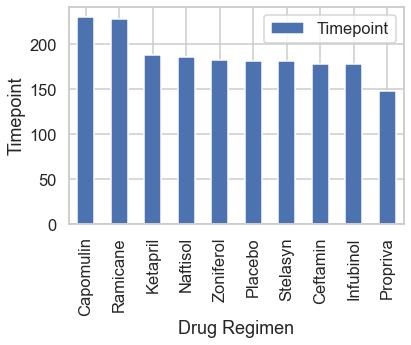

In [61]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Get data grouped by Drug Regimen
total_timepoints = clean_mice[["Timepoint", "Drug Regimen"]].groupby(["Drug Regimen"]).count()

# Sort data for plotting
sorted_timepoints = total_timepoints.sort_values(["Timepoint"], ascending=False)

# Plot bar chart using pandas
timepoints_plot = sorted_timepoints.plot.bar()
timepoints_plot.set_ylabel("Timepoint")

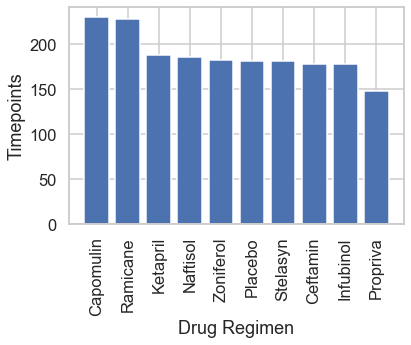

In [65]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Sort data for plotting
plt.bar(sorted_timepoints.index, sorted_timepoints['Timepoint'], color='b', alpha=1, align='center')

# Set axis labels
plt.ylabel('Timepoints') 
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')

# Show plot using pyplot
plt.show()

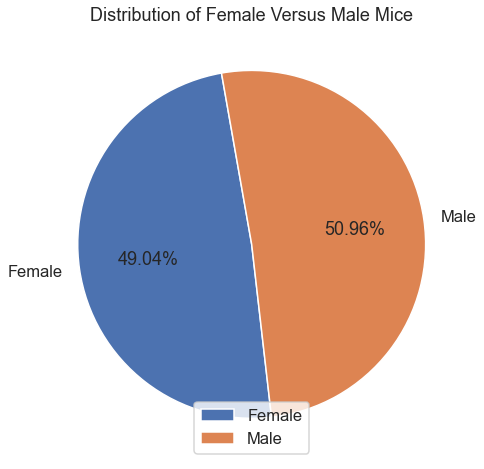

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = clean_mice.groupby(["Sex"]).count()
gender_plot = mice_gender.plot.pie(startangle=100, y = "Mouse ID", title= "Distribution of Female Versus Male Mice", autopct= "%1.2f%%", figsize=(8, 8))

# Set legend location, remove label
gender_plot.legend(loc="lower center")
gender_plot.set_ylabel("")

# Show plot
plt.show()

([<matplotlib.patches.Wedge at 0x1c280e402b0>,
 [Text(-1.088543143053058, -0.15834716831118148, ''),
  Text(1.0885431430530583, 0.1583471683111804, '')],
 [Text(-0.593750805301668, -0.0863711827151899, '49.04%'),
  Text(0.5937508053016681, 0.0863711827151893, '50.96%')])

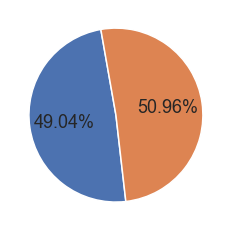

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender = clean_mice.groupby(["Sex"])["Sex"].count()
plt.pie(mice_gender, startangle=100, autopct='%1.2f%%')

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumour volume at the last timepoint


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumour vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [17]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin


In [18]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
